### EDA for `ads.csv`

Performing exploratory data analysis for `ads.csv` to gain insight about the ads used in the campaigns

In [1]:
# necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# load ads.csv
path = os.getcwd()
ads = pd.read_csv(path + "/data/ads.csv")

# display first few rows to confirm data loaded properly
ads.head()

,ad_id,campaign_id,ad_platform,ad_type,target_gender,target_age_group,target_interests
0,1,28,Facebook,Video,Female,35-44,"art, technology"
1,2,33,Facebook,Stories,All,25-34,"travel, photography"
2,3,20,Instagram,Carousel,All,25-34,technology
3,4,28,Facebook,Stories,Female,25-34,news
4,5,24,Instagram,Image,Female,25-34,news


In [3]:
# search for missing values in ads
print(f"Number of missing values in users\n{ads.isna().sum()}\n")

# drop any duplicate rows 
ads = ads.drop_duplicates()

# get info for ads
ads.info()

Number of missing values in users
ad_id               0
campaign_id         0
ad_platform         0
ad_type             0
target_gender       0
target_age_group    0
target_interests    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ad_id             200 non-null    int64 
 1   campaign_id       200 non-null    int64 
 2   ad_platform       200 non-null    object
 3   ad_type           200 non-null    object
 4   target_gender     200 non-null    object
 5   target_age_group  200 non-null    object
 6   target_interests  200 non-null    object
dtypes: int64(2), object(5)
memory usage: 11.1+ KB


In [35]:
campaigns = set(ads['campaign_id'])
missing_campaigns = set(range(1,51)) - campaigns
str(missing_campaigns).replace('{', '').replace('}', '')

'16, 43'

In [37]:
# statistics for combined visualization
total_ads = len(ads)
total_campaigns = len(ads['campaign_id'].value_counts())
campaigns = set(ads['campaign_id'])
missing_campaigns = set(range(1,51)) - campaigns
campaign_text = str(missing_campaigns).replace('{', '').replace('}', '')

platform_counts = ads['ad_platform'].value_counts()
type_counts = ads[['ad_type', 'ad_platform']].groupby(by = 'ad_platform').value_counts().to_frame()
gender_counts = ads[['target_gender', 'ad_platform']].groupby(by = 'ad_platform').value_counts().to_frame()
age_group_counts = ads[['target_age_group', 'ad_platform']].groupby(by = 'ad_platform').value_counts().to_frame()

# create list of interests for each entry
ads['interests_list'] = ads['target_interests'].str.split(r',\s*')

# blow up list into multiple rows, one for each interest in the list
ads_exploded = ads.explode('interests_list')

# tally interests
interests_counts = ads_exploded['interests_list'].value_counts().to_frame()

total_interests = len(interests_counts)

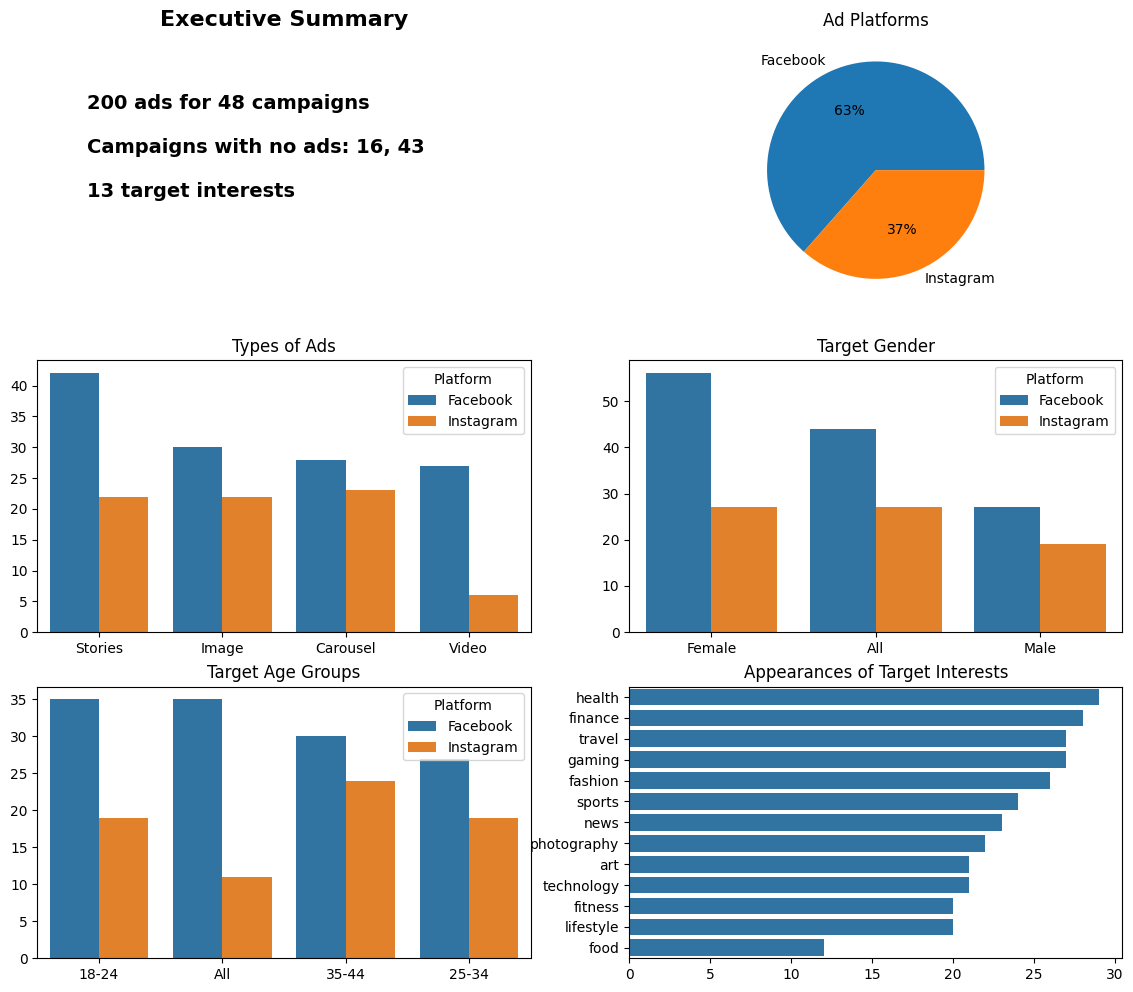

In [41]:
# combined visualization
fig = plt.figure(figsize = (14,12))

# executive summary
plt.subplot(3, 2, 1)
plt.text(0.1, 0.4, f'{total_ads} ads for {total_campaigns} campaigns\n\nCampaigns with no ads: {campaign_text}\n\n{total_interests} target interests',
         fontsize = 14, fontweight = 'bold')
plt.title('Executive Summary', fontsize = 16, fontweight = 'bold')
plt.axis('off')

# pie chart for split of platform
plt.subplot(3, 2, 2)
plt.pie(x = platform_counts.values, labels = platform_counts.index, autopct = '%1.0f%%')
plt.title("Ad Platforms")

# barchart of ad type, divided by platform
plt.subplot(3, 2, 3)
sns.barplot(data = type_counts.reset_index(), x = 'ad_type', y = 'count', hue = 'ad_platform')
plt.xlabel('')
plt.ylabel('')
plt.title('Types of Ads')
plt.legend(title = 'Platform')

# barchart for target gender, separated by platform
plt.subplot(3, 2, 4)
sns.barplot(data = gender_counts, x = 'target_gender', y = 'count', hue = 'ad_platform')
plt.xlabel('')
plt.ylabel('')
plt.title('Target Gender')
plt.legend(title = 'Platform')

# barplot of age group, separated by platform
plt.subplot(3, 2, 5)
sns.barplot(data = age_group_counts, x = 'target_age_group', y = 'count', hue = 'ad_platform')
plt.xlabel('')
plt.ylabel('')
plt.title('Target Age Groups')
plt.legend(title = 'Platform')

# barplot of interests (not separated by platform)
plt.subplot(3, 2, 6)
sns.barplot(data = interests_counts, x = 'count', y = 'interests_list')
plt.xlabel('')
plt.ylabel('')
plt.title('Appearances of Target Interests')

plt.show()